### Unit Simplex(单位单纯形)

用来生成权重向量，保证权重向量在目标空间中均匀分布。

对于 $m$ 个目标的多目标优化问题，**单位单纯形** $\Delta^{m-1}$ 定义为：
$$
\Delta^{m-1} = \left\{ \mathbf{w} \in \mathbb{R}^m \,\middle|\, \sum_{j=1}^m w^j = 1,\ w^j \geq 0,\ \forall j \in \{1,\dots,m\} \right\}
$$

- **约束1**：$\sum w^j = 1$ → 权重归一化（凸组合）
- **约束2**：$w^j \geq 0$ → 非负性（避免负权重导致目标反转）
- **维度特性**：单位单纯形是 $(m-1)$ 维流形（嵌入在 $m$ 维空间中）

通俗解释：在m维空间中，找到一个m-1维空间，此空间内的点（w）满足上述两个约束。

### Systematic Method(系统采样法)

在多目标优化问题中在单位单纯形上生成均匀分布权重向量的方法。

将连续单位单纯形离散化为均匀网格：
- 将每个目标轴划分为 $d$ 等份
- 权重取值限制为：$\left\{0, \frac{1}{d}, \frac{2}{d}, \dots, 1\right\}$
- 问题转化为：**寻找非负整数解 $(x_1, x_2, \dots, x_m)$ 满足**
  $$
  x_1 + x_2 + \cdots + x_m = d,\quad x_j \in \{0, 1, \dots, d\}
  $$
  其中 $w^j = x_j / d$

**"星与条"（Stars and Bars）定理**

- **目标**：将 $d$ 个不可区分的"单位权重"分配给 $m$ 个目标
- **约束**：每个目标获得 $x_j \geq 0$ 个单位，且 $\sum x_j = d$

用符号直观表示分配方案：
- **★**（星）：代表1个权重单位（共 $d$ 个）
- **|**（条）：分隔不同目标的边界（共 $m-1$ 个）

**示例**：$m=3$（三目标），$d=4$（4等分）
| 分配方案 $(x_1,x_2,x_3)$ | 可视化表示 | 权重向量 $\mathbf{w}$ |
|------------------------|------------|---------------------|
| (2, 1, 1) | `★★|★|★` | (0.5, 0.25, 0.25) |
| (3, 0, 1) | `★★★||★` | (0.75, 0.0, 0.25) |
| (0, 4, 0) | `||★★★★` | (0.0, 1.0, 0.0) |

#### 组合计数原理
- **总位置数**：$d$ 个星 + $(m-1)$ 个条 = $d + m - 1$ 个位置
- **自由度**：只需决定 $(m-1)$ 个条的位置（星自动填充剩余位置）
- **组合数公式**：
  $$
  n = \binom{d + m - 1}{m - 1} = \frac{(d + m - 1)!}{(m - 1)! \cdot d!}
  $$

最终效果：

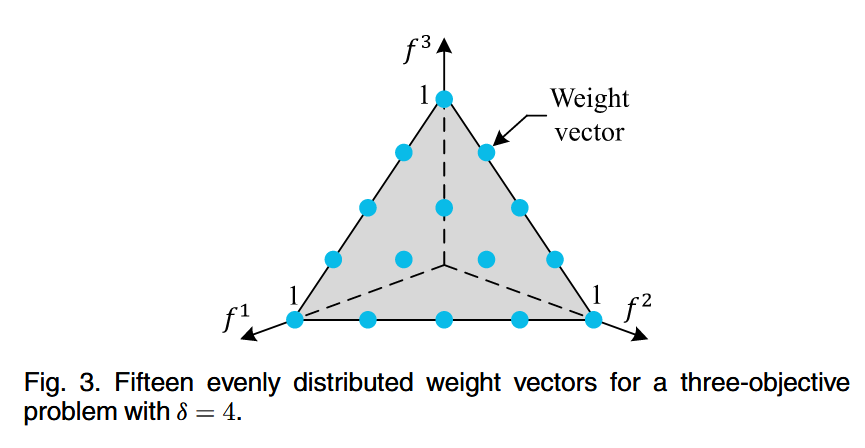